# Criação do banco de dados simulado para o Technee Banco Safra
### Equipe 5 - Safra Hackers

#### Link para download do dataset original:
#### https://www.kaggle.com/ntnu-testimon/paysim1


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

#### Removendo as fraudes

In [3]:
df = df[df['isFraud']==0]

#### Os nomes de origem não são significativos, são sempre únicos nesse dataset

In [4]:
df['nameOrig'].drop_duplicates()

0          C1231006815
1          C1666544295
4          C2048537720
5            C90045638
6           C154988899
              ...     
6362319     C642813806
6362320     C691808084
6362321     C102120699
6362322     C614459560
6362323      C49652609
Name: nameOrig, Length: 6345122, dtype: object

#### Os nomes de conta destino já tem contas com mais de uma transferência

In [5]:
df['nameDest'].drop_duplicates()

0          M1979787155
1          M2044282225
4          M1230701703
5           M573487274
6           M408069119
              ...     
6362316     M675916850
6362318    M1126011651
6362319     M747723689
6362320    C1818183087
6362322     C855350324
Name: nameDest, Length: 2719685, dtype: object

### Agrupando a quantidade de transferências pela "conta destino" do dataset

In [6]:
df_count = df.groupby(['nameDest']).count()

### 2.2 Milhões das amostras são de contas que receberam somente 1 transferência em todo dataset
### Não é interessante usar dados de contas com poucas transferências

In [7]:
df_count['amount'].value_counts().head(10)

1     2260777
2       76818
3       57210
4       45030
5       36770
6       30396
7       25760
8       21901
9       18605
10      16310
Name: amount, dtype: int64

### Tipos de transação

In [8]:
df['type'].drop_duplicates()

0       PAYMENT
9         DEBIT
15     CASH_OUT
19     TRANSFER
389     CASH_IN
Name: type, dtype: object

### Vendo perfil das contas que tem mais transferências

In [9]:
df_count.sort_values(by='amount',ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
nameDest,,,,,,,,,,
C1286084959,113,113,113,113,113,113,113,113,113,113
C985934102,109,109,109,109,109,109,109,109,109,109
C665576141,105,105,105,105,105,105,105,105,105,105
C2083562754,102,102,102,102,102,102,102,102,102,102
C248609774,101,101,101,101,101,101,101,101,101,101
C1590550415,101,101,101,101,101,101,101,101,101,101
C1789550256,99,99,99,99,99,99,99,99,99,99
C451111351,99,99,99,99,99,99,99,99,99,99
C1360767589,98,98,98,98,98,98,98,98,98,98


#### 1205 contas tem pelo menos 50 transferências

In [10]:
df_count[df_count['step']>=50]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
nameDest,,,,,,,,,,
C1001367899,52,52,52,52,52,52,52,52,52,52
C1003872245,57,57,57,57,57,57,57,57,57,57
C1005928818,55,55,55,55,55,55,55,55,55,55
C1013700132,71,71,71,71,71,71,71,71,71,71
C1014154376,54,54,54,54,54,54,54,54,54,54
...,...,...,...,...,...,...,...,...,...,...
C99509209,58,58,58,58,58,58,58,58,58,58
C997608398,59,59,59,59,59,59,59,59,59,59
C998136421,50,50,50,50,50,50,50,50,50,50


### Selecionando contas com mais de 50 transferências e filtrando as colunas

In [11]:
df2 = df.loc[df['nameDest'].isin(df_count[df_count['step']>=50].index)]

In [12]:
df3 = df2[['nameDest','type','amount','oldbalanceDest','newbalanceDest']]

In [13]:
df3

,nameDest,type,amount,oldbalanceDest,newbalanceDest
10,C997608398,DEBIT,9644.94,10845.00,157982.12
22,C515132998,DEBIT,1065.41,10330.00,0.00
24,C932583850,TRANSFER,311685.89,6267.00,2719172.89
41,C1297685781,DEBIT,5758.59,209699.00,16997.22
47,C824009085,CASH_OUT,56953.90,70253.00,64106.18
...,...,...,...,...,...
6358790,C1821075330,CASH_OUT,202691.57,8382300.59,8584992.16
6359405,C1167432890,CASH_OUT,28593.22,8089356.73,8117949.95
6359621,C814408370,CASH_OUT,216666.53,10119297.16,10335963.70
6360888,C1501536847,CASH_OUT,136062.35,10035444.63,10171506.98


In [20]:
df3['amount'] = df3['amount'] * 100

C:\Users\alexa\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df3

,nameDest,type,amount,oldbalanceDest,newbalanceDest
10,C997608398,DEBIT,9644.94,10845.00,157982.12
22,C515132998,DEBIT,1065.41,10330.00,0.00
24,C932583850,TRANSFER,311685.89,6267.00,2719172.89
41,C1297685781,DEBIT,5758.59,209699.00,16997.22
47,C824009085,CASH_OUT,56953.90,70253.00,64106.18
...,...,...,...,...,...
6358790,C1821075330,CASH_OUT,202691.57,8382300.59,8584992.16
6359405,C1167432890,CASH_OUT,28593.22,8089356.73,8117949.95
6359621,C814408370,CASH_OUT,216666.53,10119297.16,10335963.70
6360888,C1501536847,CASH_OUT,136062.35,10035444.63,10171506.98


## Coloca o valor máximo em oldbalanceDest. Esse vai ser o saldo inicial da conta.

In [120]:
for i in tqdm(df3['nameDest'].drop_duplicates()):
    df3['oldbalanceDest'].at[df3['nameDest']==i] = max(df3[df3['nameDest']==i]['oldbalanceDest'])



  0%|                                                                                         | 0/1205 [00:00<?, ?it/s]

  0%|▎                                                                                | 4/1205 [00:00<00:35, 33.90it/s]

  1%|▌                                                                                | 8/1205 [00:00<00:35, 33.64it/s]

  1%|▋                                                                               | 11/1205 [00:00<00:38, 31.05it/s]

  1%|▉                                                                               | 14/1205 [00:00<00:39, 30.26it/s]

  1%|█▏                                                                              | 18/1205 [00:00<00:38, 30.69it/s]

  2%|█▍                                                                              | 22/1205 [00:00<00:37, 31.51it/s]

  2%|█▋                                                                              | 26/1205 [00:00<00:35, 32.91it/s]

  2%|█▉                       

 22%|█████████████████▏                                                             | 262/1205 [00:07<00:27, 34.30it/s]

 22%|█████████████████▍                                                             | 266/1205 [00:08<00:26, 35.55it/s]

 22%|█████████████████▋                                                             | 270/1205 [00:08<00:27, 34.32it/s]

 23%|█████████████████▉                                                             | 274/1205 [00:08<00:26, 35.09it/s]

 23%|██████████████████▎                                                            | 279/1205 [00:08<00:24, 37.24it/s]

 24%|██████████████████▌                                                            | 284/1205 [00:08<00:23, 39.10it/s]

 24%|██████████████████▉                                                            | 289/1205 [00:08<00:22, 41.12it/s]

 24%|███████████████████▎                                                           | 294/1205 [00:08<00:22, 40.87it/s]

 25%|███████████████████▌       

 48%|██████████████████████████████████████                                         | 581/1205 [00:15<00:13, 45.08it/s]

 49%|██████████████████████████████████████▍                                        | 586/1205 [00:15<00:13, 45.20it/s]

 49%|██████████████████████████████████████▋                                        | 591/1205 [00:16<00:13, 44.91it/s]

 49%|███████████████████████████████████████                                        | 596/1205 [00:16<00:14, 43.31it/s]

 50%|███████████████████████████████████████▍                                       | 601/1205 [00:16<00:15, 40.13it/s]

 50%|███████████████████████████████████████▋                                       | 606/1205 [00:16<00:15, 38.87it/s]

 51%|███████████████████████████████████████▉                                       | 610/1205 [00:16<00:15, 37.44it/s]

 51%|████████████████████████████████████████▎                                      | 614/1205 [00:16<00:16, 36.40it/s]

 51%|███████████████████████████

 72%|█████████████████████████████████████████████████████████                      | 870/1205 [00:23<00:10, 31.46it/s]

 73%|█████████████████████████████████████████████████████████▎                     | 875/1205 [00:24<00:09, 34.38it/s]

 73%|█████████████████████████████████████████████████████████▋                     | 880/1205 [00:24<00:08, 37.09it/s]

 73%|██████████████████████████████████████████████████████████                     | 885/1205 [00:24<00:08, 39.44it/s]

 74%|██████████████████████████████████████████████████████████▎                    | 890/1205 [00:24<00:07, 41.39it/s]

 74%|██████████████████████████████████████████████████████████▋                    | 895/1205 [00:24<00:07, 42.11it/s]

 75%|███████████████████████████████████████████████████████████                    | 900/1205 [00:24<00:07, 43.40it/s]

 75%|███████████████████████████████████████████████████████████▎                   | 905/1205 [00:24<00:06, 44.36it/s]

 76%|███████████████████████████

 99%|█████████████████████████████████████████████████████████████████████████████▍| 1197/1205 [00:31<00:00, 43.19it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 1205/1205 [00:32<00:00, 37.55it/s]


In [71]:
df3[df3.index == k]['type'].values

array(['DEBIT'], dtype=object)

In [181]:
df3[df3['nameDest']=='C824009085'].index

Int64Index([     47,     181,     428,    1813,   11618,   14326,   21163,
              23088,   24675,   33141,   64258,   76269,   80064,  125525,
             153982,  162020,  167630,  174993,  196342,  214462,  222438,
             242319,  266702,  267029,  303463,  326499,  335817,  342948,
             363904,  377022,  468979,  500203,  513384,  589226,  595367,
             872267,  933793,  948381, 1116704, 1237280, 1256882, 1566576,
            1648308, 1677799, 1911023, 3206685, 3229486, 3544862, 3805424,
            5277762],
           dtype='int64')

### Reopera os valores do dataset. O saldo inicial é o maior valor encontrado na coluna oldbalanceDest.
### Opera linha a linha o saldo adicionando ou removendo o amout a depender do tipo da operação

In [191]:
from tqdm import tqdm

for i in tqdm(df3['nameDest'].drop_duplicates()):
    
    balance = float(df3[df3['nameDest']==i]['oldbalanceDest'].head(1).values)
    
    for k in df3[df3['nameDest']==i].index:
        
        if df3[df3.index == k]['type'].values in ['DEBIT','CASH_OUT','PAYMENT']:
            df3['oldbalanceDest'].at[df3.index == k] = balance
            df3['newbalanceDest'].at[df3.index == k] = balance - float(df3[df3.index == k]['amount'].values)
            balance = balance - float(df3[df3.index == k]['amount'].values)
        else:
            df3['oldbalanceDest'].at[df3.index == k] = balance
            df3['newbalanceDest'].at[df3.index == k] = balance + float(df3[df3.index == k]['amount'].values)
            balance = balance + float(df3[df3.index == k]['amount'].values)







  0%|                                                                                         | 0/1205 [00:00<?, ?it/s]




  0%|                                                                                 | 1/1205 [00:00<04:36,  4.35it/s]




  0%|▏                                                                                | 2/1205 [00:00<04:50,  4.14it/s]




  0%|▏                                                                                | 3/1205 [00:00<05:28,  3.66it/s]




  0%|▎                                                                                | 4/1205 [00:01<05:49,  3.44it/s]




  0%|▎                                                                                | 5/1205 [00:01<05:26,  3.67it/s]




  0%|▍                                                                                | 6/1205 [00:01<06:18,  3.17it/s]




  1%|▍                                                                                | 7/1205 [00:02<06:13,  3.21it/s]




  1

  5%|████▍                                                                           | 66/1205 [00:22<07:19,  2.59it/s]




  6%|████▍                                                                           | 67/1205 [00:23<06:36,  2.87it/s]




  6%|████▌                                                                           | 68/1205 [00:23<05:53,  3.21it/s]




  6%|████▌                                                                           | 69/1205 [00:23<05:28,  3.45it/s]




  6%|████▋                                                                           | 70/1205 [00:24<05:48,  3.25it/s]




  6%|████▋                                                                           | 71/1205 [00:24<05:38,  3.35it/s]




  6%|████▊                                                                           | 72/1205 [00:24<06:56,  2.72it/s]




  6%|████▊                                                                           | 73/1205 [00:25<06:50,  2.76it/s]




  6%|███

 11%|████████▋                                                                      | 132/1205 [00:42<05:09,  3.46it/s]




 11%|████████▋                                                                      | 133/1205 [00:42<06:06,  2.92it/s]




 11%|████████▊                                                                      | 134/1205 [00:42<06:21,  2.81it/s]




 11%|████████▊                                                                      | 135/1205 [00:43<05:43,  3.12it/s]




 11%|████████▉                                                                      | 136/1205 [00:43<05:39,  3.15it/s]




 11%|████████▉                                                                      | 137/1205 [00:43<05:41,  3.13it/s]




 11%|█████████                                                                      | 138/1205 [00:43<05:08,  3.46it/s]




 12%|█████████                                                                      | 139/1205 [00:44<05:03,  3.51it/s]




 12%|███

 16%|████████████▉                                                                  | 198/1205 [00:58<03:25,  4.90it/s]




 17%|█████████████                                                                  | 199/1205 [00:58<03:24,  4.91it/s]




 17%|█████████████                                                                  | 200/1205 [00:58<03:29,  4.80it/s]




 17%|█████████████▏                                                                 | 201/1205 [00:58<03:24,  4.91it/s]




 17%|█████████████▏                                                                 | 202/1205 [00:58<03:32,  4.73it/s]




 17%|█████████████▎                                                                 | 203/1205 [00:59<03:22,  4.96it/s]




 17%|█████████████▎                                                                 | 204/1205 [00:59<03:20,  5.00it/s]




 17%|█████████████▍                                                                 | 205/1205 [00:59<03:35,  4.63it/s]




 17%|███

 22%|█████████████████▎                                                             | 264/1205 [01:11<03:39,  4.29it/s]




 22%|█████████████████▎                                                             | 265/1205 [01:11<03:27,  4.54it/s]




 22%|█████████████████▍                                                             | 266/1205 [01:12<03:22,  4.63it/s]




 22%|█████████████████▌                                                             | 267/1205 [01:12<03:11,  4.90it/s]




 22%|█████████████████▌                                                             | 268/1205 [01:12<03:03,  5.10it/s]




 22%|█████████████████▋                                                             | 269/1205 [01:12<03:07,  5.00it/s]




 22%|█████████████████▋                                                             | 270/1205 [01:12<03:06,  5.02it/s]




 22%|█████████████████▊                                                             | 271/1205 [01:13<03:13,  4.83it/s]




 23%|███

 27%|█████████████████████▋                                                         | 330/1205 [01:24<03:02,  4.79it/s]




 27%|█████████████████████▋                                                         | 331/1205 [01:25<02:54,  5.01it/s]




 28%|█████████████████████▊                                                         | 332/1205 [01:25<02:53,  5.02it/s]




 28%|█████████████████████▊                                                         | 333/1205 [01:25<03:06,  4.68it/s]




 28%|█████████████████████▉                                                         | 334/1205 [01:25<03:14,  4.47it/s]




 28%|█████████████████████▉                                                         | 335/1205 [01:26<03:21,  4.31it/s]




 28%|██████████████████████                                                         | 336/1205 [01:26<03:39,  3.96it/s]




 28%|██████████████████████                                                         | 337/1205 [01:26<03:34,  4.05it/s]




 28%|███

 33%|█████████████████████████▉                                                     | 396/1205 [01:39<03:24,  3.96it/s]




 33%|██████████████████████████                                                     | 397/1205 [01:40<03:35,  3.75it/s]




 33%|██████████████████████████                                                     | 398/1205 [01:40<03:26,  3.91it/s]




 33%|██████████████████████████▏                                                    | 399/1205 [01:40<03:25,  3.93it/s]




 33%|██████████████████████████▏                                                    | 400/1205 [01:40<03:10,  4.22it/s]




 33%|██████████████████████████▎                                                    | 401/1205 [01:41<03:15,  4.11it/s]




 33%|██████████████████████████▎                                                    | 402/1205 [01:41<03:11,  4.20it/s]




 33%|██████████████████████████▍                                                    | 403/1205 [01:41<03:23,  3.95it/s]




 34%|███

 38%|██████████████████████████████▎                                                | 462/1205 [01:55<03:04,  4.03it/s]




 38%|██████████████████████████████▎                                                | 463/1205 [01:55<02:54,  4.25it/s]




 39%|██████████████████████████████▍                                                | 464/1205 [01:55<03:18,  3.73it/s]




 39%|██████████████████████████████▍                                                | 465/1205 [01:56<03:31,  3.49it/s]




 39%|██████████████████████████████▌                                                | 466/1205 [01:56<03:37,  3.40it/s]




 39%|██████████████████████████████▌                                                | 467/1205 [01:56<03:26,  3.58it/s]




 39%|██████████████████████████████▋                                                | 468/1205 [01:56<03:08,  3.91it/s]




 39%|██████████████████████████████▋                                                | 469/1205 [01:57<03:12,  3.83it/s]




 39%|███

 44%|██████████████████████████████████▌                                            | 528/1205 [02:11<02:46,  4.07it/s]




 44%|██████████████████████████████████▋                                            | 529/1205 [02:12<02:48,  4.02it/s]




 44%|██████████████████████████████████▋                                            | 530/1205 [02:12<02:53,  3.89it/s]




 44%|██████████████████████████████████▊                                            | 531/1205 [02:12<02:53,  3.88it/s]




 44%|██████████████████████████████████▉                                            | 532/1205 [02:13<02:59,  3.76it/s]




 44%|██████████████████████████████████▉                                            | 533/1205 [02:13<02:55,  3.83it/s]




 44%|███████████████████████████████████                                            | 534/1205 [02:13<03:09,  3.54it/s]




 44%|███████████████████████████████████                                            | 535/1205 [02:14<03:30,  3.18it/s]




 44%|███

 49%|██████████████████████████████████████▉                                        | 594/1205 [02:29<02:54,  3.49it/s]




 49%|███████████████████████████████████████                                        | 595/1205 [02:30<02:58,  3.43it/s]




 49%|███████████████████████████████████████                                        | 596/1205 [02:30<02:53,  3.51it/s]




 50%|███████████████████████████████████████▏                                       | 597/1205 [02:30<02:40,  3.78it/s]




 50%|███████████████████████████████████████▏                                       | 598/1205 [02:30<02:31,  4.00it/s]




 50%|███████████████████████████████████████▎                                       | 599/1205 [02:31<02:29,  4.06it/s]




 50%|███████████████████████████████████████▎                                       | 600/1205 [02:31<02:27,  4.10it/s]




 50%|███████████████████████████████████████▍                                       | 601/1205 [02:31<02:48,  3.58it/s]




 50%|███

 55%|███████████████████████████████████████████▎                                   | 660/1205 [02:48<02:45,  3.30it/s]




 55%|███████████████████████████████████████████▎                                   | 661/1205 [02:48<02:36,  3.48it/s]




 55%|███████████████████████████████████████████▍                                   | 662/1205 [02:48<02:34,  3.51it/s]




 55%|███████████████████████████████████████████▍                                   | 663/1205 [02:48<02:24,  3.75it/s]




 55%|███████████████████████████████████████████▌                                   | 664/1205 [02:49<02:17,  3.92it/s]




 55%|███████████████████████████████████████████▌                                   | 665/1205 [02:49<02:18,  3.91it/s]




 55%|███████████████████████████████████████████▋                                   | 666/1205 [02:49<02:11,  4.11it/s]




 55%|███████████████████████████████████████████▋                                   | 667/1205 [02:49<02:00,  4.47it/s]




 55%|███

 60%|███████████████████████████████████████████████▌                               | 726/1205 [03:02<02:04,  3.85it/s]




 60%|███████████████████████████████████████████████▋                               | 727/1205 [03:02<02:04,  3.83it/s]




 60%|███████████████████████████████████████████████▋                               | 728/1205 [03:02<01:53,  4.20it/s]




 60%|███████████████████████████████████████████████▊                               | 729/1205 [03:02<01:47,  4.41it/s]




 61%|███████████████████████████████████████████████▊                               | 730/1205 [03:02<01:43,  4.59it/s]




 61%|███████████████████████████████████████████████▉                               | 731/1205 [03:03<01:37,  4.88it/s]




 61%|███████████████████████████████████████████████▉                               | 732/1205 [03:03<01:35,  4.94it/s]




 61%|████████████████████████████████████████████████                               | 733/1205 [03:03<01:32,  5.11it/s]




 61%|███

 66%|███████████████████████████████████████████████████▉                           | 792/1205 [03:16<01:33,  4.42it/s]




 66%|███████████████████████████████████████████████████▉                           | 793/1205 [03:16<01:35,  4.33it/s]




 66%|████████████████████████████████████████████████████                           | 794/1205 [03:16<01:38,  4.16it/s]




 66%|████████████████████████████████████████████████████                           | 795/1205 [03:16<01:32,  4.44it/s]




 66%|████████████████████████████████████████████████████▏                          | 796/1205 [03:16<01:27,  4.68it/s]




 66%|████████████████████████████████████████████████████▎                          | 797/1205 [03:17<01:26,  4.74it/s]




 66%|████████████████████████████████████████████████████▎                          | 798/1205 [03:17<01:23,  4.86it/s]




 66%|████████████████████████████████████████████████████▍                          | 799/1205 [03:17<01:31,  4.45it/s]




 66%|███

 71%|████████████████████████████████████████████████████████▎                      | 858/1205 [03:30<01:19,  4.34it/s]




 71%|████████████████████████████████████████████████████████▎                      | 859/1205 [03:30<01:15,  4.58it/s]




 71%|████████████████████████████████████████████████████████▍                      | 860/1205 [03:30<01:15,  4.59it/s]




 71%|████████████████████████████████████████████████████████▍                      | 861/1205 [03:31<01:10,  4.88it/s]




 72%|████████████████████████████████████████████████████████▌                      | 862/1205 [03:31<01:08,  5.01it/s]




 72%|████████████████████████████████████████████████████████▌                      | 863/1205 [03:31<01:13,  4.67it/s]




 72%|████████████████████████████████████████████████████████▋                      | 864/1205 [03:31<01:12,  4.74it/s]




 72%|████████████████████████████████████████████████████████▋                      | 865/1205 [03:31<01:09,  4.87it/s]




 72%|███

 77%|████████████████████████████████████████████████████████████▌                  | 924/1205 [03:45<01:07,  4.15it/s]




 77%|████████████████████████████████████████████████████████████▋                  | 925/1205 [03:45<01:02,  4.45it/s]




 77%|████████████████████████████████████████████████████████████▋                  | 926/1205 [03:45<01:05,  4.29it/s]




 77%|████████████████████████████████████████████████████████████▊                  | 927/1205 [03:46<01:01,  4.50it/s]




 77%|████████████████████████████████████████████████████████████▊                  | 928/1205 [03:46<00:59,  4.69it/s]




 77%|████████████████████████████████████████████████████████████▉                  | 929/1205 [03:46<00:58,  4.72it/s]




 77%|████████████████████████████████████████████████████████████▉                  | 930/1205 [03:46<01:02,  4.38it/s]




 77%|█████████████████████████████████████████████████████████████                  | 931/1205 [03:46<00:59,  4.59it/s]




 77%|███

 82%|████████████████████████████████████████████████████████████████▉              | 990/1205 [04:02<00:59,  3.64it/s]




 82%|████████████████████████████████████████████████████████████████▉              | 991/1205 [04:03<00:56,  3.82it/s]




 82%|█████████████████████████████████████████████████████████████████              | 992/1205 [04:03<01:00,  3.55it/s]




 82%|█████████████████████████████████████████████████████████████████              | 993/1205 [04:03<00:57,  3.71it/s]




 82%|█████████████████████████████████████████████████████████████████▏             | 994/1205 [04:04<00:56,  3.76it/s]




 83%|█████████████████████████████████████████████████████████████████▏             | 995/1205 [04:04<00:57,  3.67it/s]




 83%|█████████████████████████████████████████████████████████████████▎             | 996/1205 [04:04<00:54,  3.83it/s]




 83%|█████████████████████████████████████████████████████████████████▎             | 997/1205 [04:04<00:55,  3.78it/s]




 83%|███

 88%|████████████████████████████████████████████████████████████████████▎         | 1056/1205 [04:23<00:47,  3.12it/s]




 88%|████████████████████████████████████████████████████████████████████▍         | 1057/1205 [04:23<00:44,  3.33it/s]




 88%|████████████████████████████████████████████████████████████████████▍         | 1058/1205 [04:23<00:43,  3.36it/s]




 88%|████████████████████████████████████████████████████████████████████▌         | 1059/1205 [04:24<00:39,  3.68it/s]




 88%|████████████████████████████████████████████████████████████████████▌         | 1060/1205 [04:24<00:41,  3.47it/s]




 88%|████████████████████████████████████████████████████████████████████▋         | 1061/1205 [04:24<00:41,  3.48it/s]




 88%|████████████████████████████████████████████████████████████████████▋         | 1062/1205 [04:24<00:38,  3.74it/s]




 88%|████████████████████████████████████████████████████████████████████▊         | 1063/1205 [04:25<00:39,  3.58it/s]




 88%|███

 93%|████████████████████████████████████████████████████████████████████████▋     | 1122/1205 [04:41<00:22,  3.72it/s]




 93%|████████████████████████████████████████████████████████████████████████▋     | 1123/1205 [04:42<00:24,  3.41it/s]




 93%|████████████████████████████████████████████████████████████████████████▊     | 1124/1205 [04:42<00:22,  3.55it/s]




 93%|████████████████████████████████████████████████████████████████████████▊     | 1125/1205 [04:42<00:24,  3.33it/s]




 93%|████████████████████████████████████████████████████████████████████████▉     | 1126/1205 [04:43<00:26,  3.03it/s]




 94%|████████████████████████████████████████████████████████████████████████▉     | 1127/1205 [04:43<00:25,  3.06it/s]




 94%|█████████████████████████████████████████████████████████████████████████     | 1128/1205 [04:43<00:25,  3.00it/s]




 94%|█████████████████████████████████████████████████████████████████████████     | 1129/1205 [04:44<00:26,  2.91it/s]




 94%|███

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1188/1205 [05:01<00:04,  3.94it/s]




 99%|████████████████████████████████████████████████████████████████████████████▉ | 1189/1205 [05:01<00:03,  4.32it/s]




 99%|█████████████████████████████████████████████████████████████████████████████ | 1190/1205 [05:01<00:03,  4.04it/s]




 99%|█████████████████████████████████████████████████████████████████████████████ | 1191/1205 [05:01<00:03,  4.09it/s]




 99%|█████████████████████████████████████████████████████████████████████████████▏| 1192/1205 [05:02<00:03,  4.33it/s]




 99%|█████████████████████████████████████████████████████████████████████████████▏| 1193/1205 [05:02<00:02,  4.51it/s]




 99%|█████████████████████████████████████████████████████████████████████████████▎| 1194/1205 [05:02<00:02,  4.69it/s]




 99%|█████████████████████████████████████████████████████████████████████████████▎| 1195/1205 [05:02<00:02,  4.94it/s]




 99%|███

# EXTRA - kmeans

### Separação simples de treino e teste pra validar 

In [228]:
df_train = df3[0:55000]
df_test = df3[55000:]

# KMeans

In [207]:
from sklearn.cluster import KMeans
import numpy as np

model = KMeans(n_clusters=3)

In [229]:
model.fit(df_train[['amount','newbalanceDest']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [231]:
df_train['kmeans'] = model.labels_

C:\Users\alexa\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
df_train['kmeans'].value_counts()

0    44635
2     8801
1     1564
Name: kmeans, dtype: int64

In [233]:
model.cluster_centers_

array([[3.01354041e+05, 1.39724612e+07],
       [4.37554005e+05, 1.27108071e+08],
       [3.94294761e+05, 4.30862078e+07]])

No handles with labels found to put in legend.


Text(0, 0.5, 'new balance')

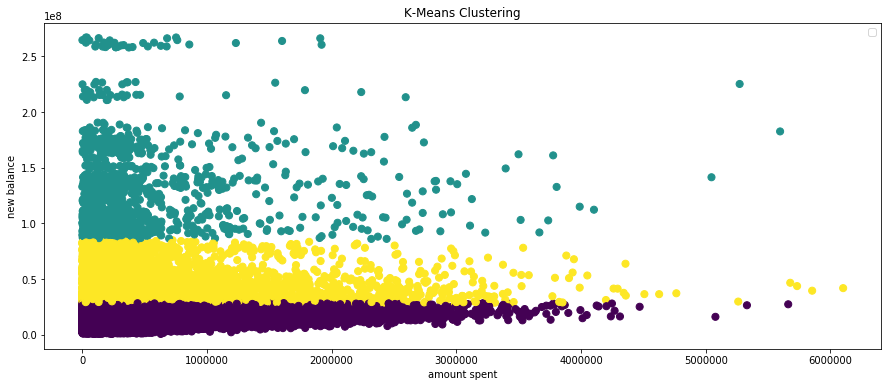

In [234]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_train['amount'],df_train['newbalanceDest'],c=df_train['kmeans'],s=50)

plt.legend()
ax.set_title('K-Means Clustering')
ax.set_xlabel('amount spent')
ax.set_ylabel('new balance')

# Teste

In [240]:
df_test['kmeans'] = model.predict(df_test[['amount','newbalanceDest']])

array([0, 0, 0, ..., 0, 0, 2])

No handles with labels found to put in legend.


Text(0, 0.5, 'new balance')

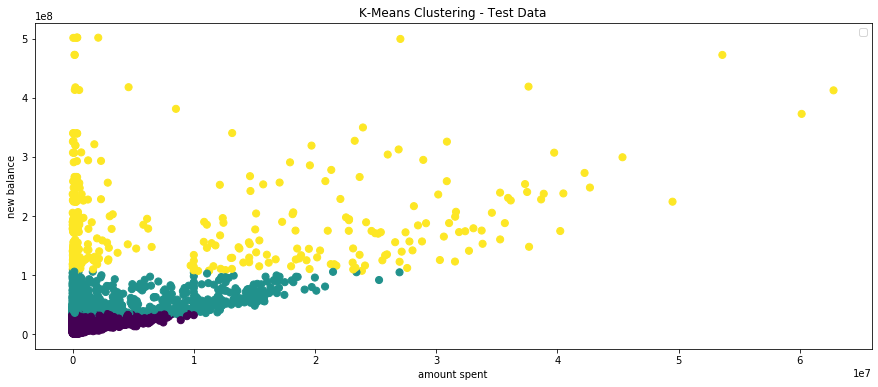

In [242]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_test['amount'],df_test['newbalanceDest'],c=df_test['kmeans'],s=50)

plt.legend()
ax.set_title('K-Means Clustering - Test Data')
ax.set_xlabel('amount spent')
ax.set_ylabel('new balance')